## The Dataset

The dataset in concerning on a bank churn rates and the bank want to know waht the problem for the high rate of churn. The bank want to assess and address the churn rates problem. The dataset contains:

$\bullet$ Customer ID

$\bullet$ Surname

$\bullet$ Geography

$\bullet$ Gender

$\bullet$ Age

$\bullet$ Tenure - How long they stay with the bank.

$\bullet$ Balance

$\bullet$ Num Of Products - Loan\Savings account

$\bullet$ Has Card

$\bullet$ Is Active Member

$\bullet$ Estimate dSalary

The independet variable (target variable) is the Exited variable. This variable is a binary target and it is tell us, whether the customer stay or not in the bank.

## Data Preprocessing

### Importing the libraries


In [63]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Importing the dataset

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


We can see the there are some features that not belong to the classification task. 'RowNumber', 'CustomerId', and 'Surname' have no impact on the 'Exited' variable. Therefore, we going to drop them.

In [4]:
df.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)

In [5]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Missing Values

### Helper function

In [6]:
def missing_values_table(df): 
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum()/len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    return mis_val_table_ren_columns

In [7]:
missing_values_table(df)

,Missing Values,% of Total Values
CreditScore,0,0.0
Geography,0,0.0
Gender,0,0.0
Age,0,0.0
Tenure,0,0.0
Balance,0,0.0
NumOfProducts,0,0.0
HasCrCard,0,0.0
IsActiveMember,0,0.0
EstimatedSalary,0,0.0


We do not have features with missing values. We can proceed our analysis.

Another approach is to use just the built-in function in pandas

In [8]:
# Alternatively, you can see the number of missing values like this
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## What datatypes are in the dataframe?

As a general rule of thumb, features with a datatype of object could be considered categorical features. And those which are floats or ints (numbers) could be considered numerical features.

However, as we dig deeper, we might find features which are numerical may actually be categorical.

In [9]:
# Different data types in the dataset
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

## EDA

### Target Feature: Exited

Description: Whether the passenger survived or not.

Key: 0 = Did not leave the bank, 1 = leave the bank

This is the variable we want our machine learning model to predict based off all the others.


0    7963
1    2037
Name: Exited, dtype: int64


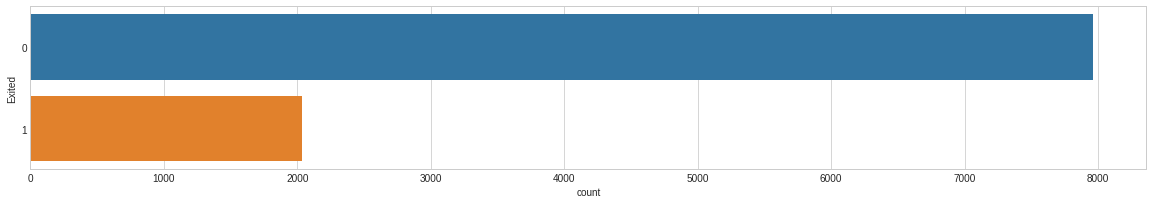

In [10]:
# How many people leave the bank?
fig = plt.figure(figsize=(20,3))
sns.countplot(y='Exited', data=df);
print(df.Exited.value_counts())

### Age

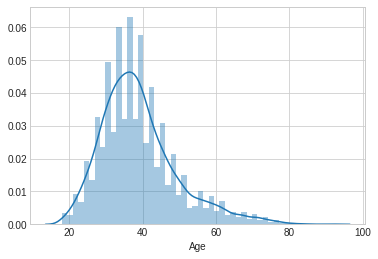

In [11]:
sns.distplot(df.Age)

### Feature: Gender

Description: The Gender of the customer (male or female).


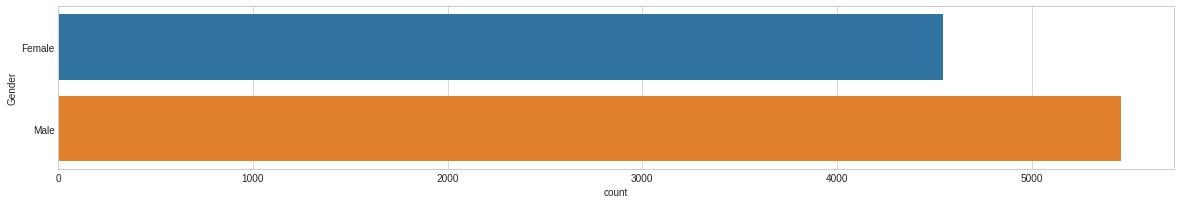

In [12]:
# Let's view the distribution of Gender
plt.figure(figsize=(20, 3))
sns.countplot(y="Gender", data=df);

In [17]:
df.Gender.head()

0    Female
1    Female
2    Female
3    Female
4    Female
Name: Gender, dtype: object

In [18]:
df.Gender = df.Gender.map({'Female':0, 'Male':1})

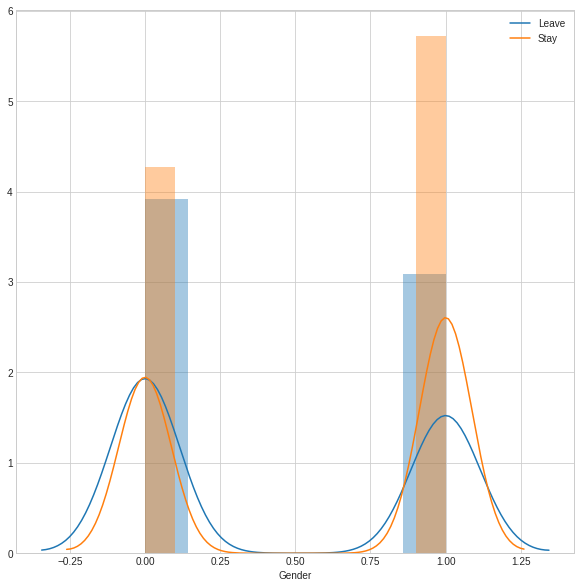

In [20]:
# How does the Gender variable look compared to Exited?
# We can see this because they're both binarys.
fig = plt.figure(figsize=(10, 10))
sns.distplot(df.loc[df['Exited'] == 1]['Gender'], kde_kws={'label': 'Leave'});
sns.distplot(df.loc[df['Exited'] == 0]['Gender'], kde_kws={'label': 'Stay'});

We can see that more Male left the bank that Females

## Encoding categorical data

### Encoding the Independent Variable

Which categorical features we have?

Geography and Gender features. We alreday encode the Gender features with the map method.

In [21]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [22]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [24]:
pd.get_dummies(df.Geography, prefix='Geography').head()

,Geography_France,Geography_Germany,Geography_Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1


In [27]:
pd.get_dummies(df.Geography, prefix='Geography').iloc[:,1:].head(10)

,Geography_Germany,Geography_Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
5,0,1
6,0,0
7,1,0
8,0,0
9,0,0


We use only this two columns because will still identify  which country for every row. When both 'Geography_Germany' and 'Geography_Spain' in particular row are equal to zero that means we concern the 'Geography_France'. Thus, we do not need all the three dummies.

In [28]:
Geography_dummies = pd.get_dummies(df.Geography, prefix='Geography').iloc[:,1:].head(10)

In [30]:
df = pd.concat([df, Geography_dummies], axis=1)

In [31]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,France,0,42,2,0.00,1,1,1,101348.88,1,0.0,0.0
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,0.0,1.0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1,0.0,0.0
3,699,France,0,39,1,0.00,2,0,0,93826.63,0,0.0,0.0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,0.0,1.0


We can see that the original 'Geography' variable is still in our dataframe. We can just drop the column or we can run a method below that drop all the colunm that get dummies without any redundant columns.

In [44]:
df = pd.read_csv('Churn_Modelling.csv')
df.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)

In [45]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [46]:
pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True).head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
5,645,44,8,113755.78,2,1,0,149756.71,1,0,1,1
6,822,50,7,0.00,2,1,1,10062.80,0,0,0,1
7,376,29,4,115046.74,4,1,0,119346.88,1,1,0,0
8,501,44,4,142051.07,2,0,1,74940.50,0,0,0,1
9,684,27,2,134603.88,1,1,1,71725.73,0,0,0,1


In [47]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

We will change the order of the columns in the dataframe such the 'Exited' variable will be the last column.

In [52]:
cols = df.columns.tolist()
cols = cols[-3:] + cols[:-3]
cols

['Geography_Germany',
 'Geography_Spain',
 'Gender_Male',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [53]:
df = df[cols]

In [54]:
df.head()

,Geography_Germany,Geography_Spain,Gender_Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,0,0,619,42,2,0.00,1,1,1,101348.88,1
1,0,1,0,608,41,1,83807.86,1,0,1,112542.58,0
2,0,0,0,502,42,8,159660.80,3,1,0,113931.57,1
3,0,0,0,699,39,1,0.00,2,0,0,93826.63,0
4,0,1,0,850,43,2,125510.82,1,1,1,79084.10,0


### Converting to arrays

In [55]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

### Splitting the dataset into the Training set and Test set

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

###  Feature Scaling

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Importing the Keras libraries and packages


In [59]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


### Initialising the ANN

In [60]:
classifier = Sequential()

### Adding the input layer and the first hidden layer


In [61]:
df.shape

(10000, 12)

In [64]:
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))

### Adding the second hidden layer


In [65]:
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

### Adding the output layer


In [66]:
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

### Compiling the ANN

In [67]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Fitting the ANN to the Training set

In [68]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
8000/8000 [==============================] - 1s 117us/step - loss: 0.4859 - acc: 0.7957
Epoch 2/100
8000/8000 [==============================] - 1s 76us/step - loss: 0.4290 - acc: 0.7960
Epoch 3/100
8000/8000 [==============================] - 1s 96us/step - loss: 0.4230 - acc: 0.7976
Epoch 4/100
8000/8000 [==============================] - 1s 93us/step - loss: 0.4186 - acc: 0.8212
Epoch 5/100
8000/8000 [==============================] - 1s 78us/step - loss: 0.4160 - acc: 0.8274
Epoch 6/100
8000/8000 [==============================] - 1s 78us/step - loss: 0.4145 - acc: 0.8305
Epoch 7/100
8000/8000 [==============================] - 1s 73us/step - loss: 0.4123 - acc: 0.8321
Epoch 8/100
8000/8000 [==============================] - 1s 71us/step - loss: 0.4108 - acc: 0.8337
Epoch 9/100
8000/8000 [==============================] - 1s 72us/step - loss: 0.4102 - acc: 0.8349
Epoch 10/100
8000/8000 [==============================] - 1s

8000/8000 [==============================] - 1s 107us/step - loss: 0.3982 - acc: 0.8380
Epoch 81/100
8000/8000 [==============================] - 1s 86us/step - loss: 0.3984 - acc: 0.8392
Epoch 82/100
8000/8000 [==============================] - 1s 84us/step - loss: 0.3976 - acc: 0.8375
Epoch 83/100
8000/8000 [==============================] - 1s 83us/step - loss: 0.3984 - acc: 0.8369
Epoch 84/100
8000/8000 [==============================] - 1s 74us/step - loss: 0.3982 - acc: 0.8360
Epoch 85/100
8000/8000 [==============================] - 1s 91us/step - loss: 0.3982 - acc: 0.8370
Epoch 86/100
8000/8000 [==============================] - 1s 92us/step - loss: 0.3985 - acc: 0.8347
Epoch 87/100
8000/8000 [==============================] - 1s 92us/step - loss: 0.3974 - acc: 0.8371
Epoch 88/100
8000/8000 [==============================] - 1s 99us/step - loss: 0.3982 - acc: 0.8369
Epoch 89/100
8000/8000 [==============================] - 1s 107us/step - loss: 0.3979 - acc: 0.8367
Epoch 90/10

### Predicting the Test set results


In [73]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [74]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

So the y_pred is the probability of the preson in the test set is going to leave the bank. 

### Making the Confusion Matrix


In [80]:
from sklearn.metrics import confusion_matrix
confusion_new = confusion_matrix(y_test, y_pred)

In [82]:
confusion_new

array([[1539,   56],
       [ 258,  147]])

In [83]:
# The accuracy

(1539+147)/(1539+56+258+147)

0.843

Let check if a person will stay with a new array of obsevation:

In [135]:
new_person = np.array([1,0,1,300,35,2,27000,2,1,1,20000]).reshape(1,-1)

In [136]:
new_prediction = classifier.predict(new_person)
new_prediction = (y_pred > 0.5)

In [137]:
new_prediction

array([[False]])

This particular person will not leave the bank.

### Evaluating, Improving and Tuning the ANN

### Evaluating the ANN

In [138]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense

def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])    
    return classifier

In [139]:
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, n_jobs = -1)
mean = accuracies.mean()
variance = accuracies.std()

In [141]:
accuracies

array([0.83375   , 0.83249999, 0.83249999, 0.82125   , 0.87374999,
       0.86125   , 0.84      , 0.83375   , 0.82125   , 0.86499999])

In [140]:
mean, variance

(0.8414999949932099, 0.017569504034317427)

The variance is small and it seems we do not overfit with our model

### The data and keras code were taken from SuperDataScience.